<a href="https://colab.research.google.com/github/amann-03/Machine-Learning-Tasks/blob/main/Task2_PostmanAPI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd


url = '/content/drive/MyDrive/smoking_driking_dataset_Ver01.csv'
sdd = pd.read_csv(url)
sdd.info()
# gives whole data info including type of datatypes used with it's count and if there are any missing values by non-null count

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991346 entries, 0 to 991345
Data columns (total 24 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   sex               991346 non-null  object 
 1   age               991346 non-null  int64  
 2   height            991346 non-null  int64  
 3   weight            991346 non-null  int64  
 4   waistline         991346 non-null  float64
 5   sight_left        991346 non-null  float64
 6   sight_right       991346 non-null  float64
 7   hear_left         991346 non-null  int64  
 8   hear_right        991346 non-null  int64  
 9   SBP               991346 non-null  int64  
 10  DBP               991346 non-null  int64  
 11  BLDS              991346 non-null  int64  
 12  tot_chole         991346 non-null  int64  
 13  HDL_chole         991346 non-null  int64  
 14  LDL_chole         991346 non-null  int64  
 15  triglyceride      991346 non-null  int64  
 16  hemoglobin        99

In [ ]:
sdd.describe()
# gives us the descriptive structure of the numerical data

,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,DBP,...,HDL_chole,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd
count,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,...,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000
mean,47.614491,162.240625,63.284050,81.233358,0.980834,0.978429,1.031495,1.030476,122.432498,76.052627,...,56.936800,113.037692,132.141751,14.229824,1.094224,0.860467,25.989308,25.755051,37.136347,1.608122
std,14.181339,9.282957,12.514241,11.850323,0.605949,0.604774,0.174650,0.171892,14.543148,9.889365,...,17.238479,35.842812,102.196985,1.584929,0.437724,0.480530,23.493386,26.308599,50.424153,0.818507
min,20.000000,130.000000,25.000000,8.000000,0.100000,0.100000,1.000000,1.000000,67.000000,32.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.100000,1.000000,1.000000,1.000000,1.000000
25%,35.000000,155.000000,55.000000,74.100000,0.700000,0.700000,1.000000,1.000000,112.000000,70.000000,...,46.000000,89.000000,73.000000,13.200000,1.000000,0.700000,19.000000,15.000000,16.000000,1.000000
50%,45.000000,160.000000,60.000000,81.000000,1.000000,1.000000,1.000000,1.000000,120.000000,76.000000,...,55.000000,111.000000,106.000000,14.300000,1.000000,0.800000,23.000000,20.000000,23.000000,1.000000
75%,60.000000,170.000000,70.000000,87.800000,1.200000,1.200000,1.000000,1.000000,131.000000,82.000000,...,66.000000,135.000000,159.000000,15.400000,1.000000,1.000000,28.000000,29.000000,39.000000,2.000000
max,85.000000,190.000000,140.000000,999.000000,9.900000,9.900000,2.000000,2.000000,273.000000,185.000000,...,8110.000000,5119.000000,9490.000000,25.000000,6.000000,98.000000,9999.000000,7210.000000,999.000000,3.000000


In [ ]:
# Categorical columns
cat_col = [col for col in sdd.columns if sdd[col].dtype == 'object']
print('Categorical columns :',cat_col)
# Numerical columns
num_col = [col for col in sdd.columns if sdd[col].dtype != 'object']
print('Numerical columns :',num_col)

Categorical columns : ['sex', 'DRK_YN']
Numerical columns : ['age', 'height', 'weight', 'waistline', 'sight_left', 'sight_right', 'hear_left', 'hear_right', 'SBP', 'DBP', 'BLDS', 'tot_chole', 'HDL_chole', 'LDL_chole', 'triglyceride', 'hemoglobin', 'urine_protein', 'serum_creatinine', 'SGOT_AST', 'SGOT_ALT', 'gamma_GTP', 'SMK_stat_type_cd']


In [ ]:
sdd.duplicated()
# checks if any full row is repeated coz. that will be duplicated data and we don't require that

0         False
1         False
2         False
3         False
4         False
          ...  
991341    False
991342    False
991343    False
991344    False
991345    False
Length: 991346, dtype: bool

In [ ]:
sdd[cat_col].nunique()
# returns the no. of unique values in each categorical column

sex       2
DRK_YN    2
dtype: int64

In [ ]:
sdd[num_col].nunique()
# returns the no. of unique values in each numerical column

age                   14
height                13
weight                24
waistline            737
sight_left            24
sight_right           24
hear_left              2
hear_right             2
SBP                  171
DBP                  127
BLDS                 498
tot_chole            474
HDL_chole            223
LDL_chole            432
triglyceride        1657
hemoglobin           190
urine_protein          6
serum_creatinine     183
SGOT_AST             568
SGOT_ALT             594
gamma_GTP            940
SMK_stat_type_cd       3
dtype: int64

In [ ]:
sdd2 = sdd.drop(columns=['hear_left','hear_right'])
sdd3 =sdd2
sdd2.shape
sdd3.shape
# since the value in both these fatures were nearly constant to 1 so they won't affect our model, hence dropping them

(991346, 22)

In [ ]:
sdd2.skew(axis =0,skipna = True)

# axis means row and we are talking about 1st row i.e columns and finding skewness of each column and skipna means skipping null values
# I did check the skewness coz. it gives us the rough idea to apply which method for dealing with outliers in them.
# generally, for moderate skewness we use IQR boxplot method and for large skewness, either transformations(like log.) or capping or truncating them can be a good choice.

<ipython-input-15-c454e5f12143>:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  sdd2.skew(axis =0,skipna = True)


age                   0.153653
height               -0.022737
weight                0.576557
waistline            26.788440
sight_left            9.994626
sight_right          10.033647
SBP                   0.482060
DBP                   0.400034
BLDS                  4.617377
tot_chole             1.556882
HDL_chole           104.577635
LDL_chole             5.251739
triglyceride          6.529373
hemoglobin           -0.383988
urine_protein         5.672491
serum_creatinine    111.022058
SGOT_AST            150.491690
SGOT_ALT             50.038872
gamma_GTP             7.718509
SMK_stat_type_cd      0.831428
dtype: float64

In [ ]:
columns_list = ['age','height','weight','SBP','DBP','tot_chole','hemoglobin']
print(columns_list)

['age', 'height', 'weight', 'SBP', 'DBP', 'tot_chole', 'hemoglobin']


In [ ]:
# IQR Method for removing outliers for moderately skewed distributions

for col in columns_list:

   Q1 = sdd2[col].quantile(0.25)
   Q3 = sdd2[col].quantile(0.75)
   IQR = Q3 - Q1
   lower_bound = Q1 - 1.5*IQR
   upper_bound = Q3 + 1.5*IQR

   sdd3 = sdd2[(sdd2[col] > lower_bound) & (sdd2[col] < upper_bound)]

for col in columns_list:
   print(f"{col}: ", sdd3[col].skew())

print("\n")
sdd3.shape


age:  0.14616193776406716
height:  -0.027147144447567287
weight:  0.5739452255953992
SBP:  0.48066848455613004
DBP:  0.3999893768113092
tot_chole:  1.5637295734422172
hemoglobin:  -0.08396840398355186




(981586, 22)

In [ ]:
sdd2.shape

(991346, 22)

In [ ]:
sdd4 = sdd3
sdd4.loc[:,'bmi_index'] = (sdd4['weight'] / (sdd4['height']/100)**2)
del sdd4['weight']
del sdd4['height']
sdd4.shape

<ipython-input-6-74df3ff120dd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sdd4.loc[:,'bmi_index'] = (sdd4['weight'] / (sdd4['height']/100)**2)


(981586, 21)

In [ ]:
sdd4.shape

(981586, 21)

<ipython-input-107-fcd9dbf2bdce>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sdd4['SGOT_AST'])


<Axes: xlabel='SGOT_AST', ylabel='Density'>

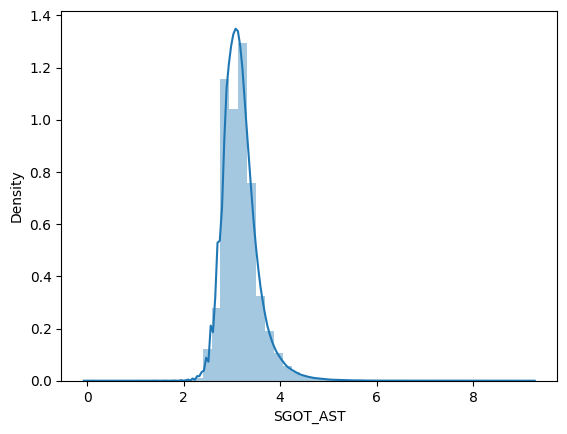

In [ ]:
import seaborn as sns
sns.distplot(sdd4['SGOT_AST'])

# this is just to illustrate how skewed the data is and it's not a good idea to remove so many outliers coz. it can affect our model prediction
# so they must be managed by some techniques like log transformation(for positively skewed data) or square root transformation

In [ ]:
skewed_columns = ['waistline','sight_left','sight_right','BLDS','HDL_chole','LDL_chole','triglyceride','serum_creatinine','urine_protein','SGOT_AST','SGOT_ALT','gamma_GTP']
print(skewed_columns)

['waistline', 'sight_left', 'sight_right', 'BLDS', 'HDL_chole', 'LDL_chole', 'triglyceride', 'serum_creatinine', 'urine_protein', 'SGOT_AST', 'SGOT_ALT', 'gamma_GTP']


In [ ]:
sdd3.shape

(981586, 21)

In [ ]:
sdd3['sex'] = pd.factorize(sdd3['sex'])[0]
sdd3['DRK_YN'] = pd.factorize(sdd3['DRK_YN'])[0]
print(sdd3['DRK_YN'])

<ipython-input-9-9eb2c018b2a2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sdd3['sex'] = pd.factorize(sdd3['sex'])[0]


0         0
1         1
2         1
3         1
4         1
         ..
991341    1
991342    1
991343    0
991344    1
991345    0
Name: DRK_YN, Length: 981586, dtype: int64


<ipython-input-9-9eb2c018b2a2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sdd3['DRK_YN'] = pd.factorize(sdd3['DRK_YN'])[0]


In [ ]:
sdd3.loc[:,'bmi_index'] = (sdd2['weight'] / (sdd2['height']/100)**2)

In [ ]:
# finding correlation values
# to know how much our columns are related to output variables

for col in sdd.columns:
  print(f"{col}: ",sdd[col].corr(sdd['DRK_YN']))
  print(f"{col}: ",sdd[col].corr(sdd['SMK_stat_type_cd']))
  print("\n")

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
sdd3 = sdd3.drop('sex',axis=1)

In [ ]:
sdd3 = sdd3.drop('urine_protein',axis=1)
# after the transformation , this column is nearly constant and won't affect our model and also before it wasn't ,so i drop this.

In [ ]:
sdd3 = sdd3.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,18,16,17]]
sdd3

# changing the order of columns as a i added a new column named bmi-index, so i want the 2 outputs columns to be last

In [ ]:
x = sdd3.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,18]]
y = sdd3.iloc[:,17:18]
print(x)

        age  waistline  sight_left  sight_right  SBP  DBP      BLDS  \
0        35   4.499810    0.000000     0.000000  120   80  4.595120   
1        30   4.488636   -0.105361     0.182322  130   82  4.663439   
2        40   4.510860    0.182322     0.405465  120   70  4.584967   
3        50   4.510860    0.405465     0.182322  145   87  4.553877   
4        50   4.382027    0.000000     0.182322  138   82  4.615121   
...     ...        ...         ...          ...  ...  ...       ...   
991341   45   4.522875    0.405465     0.405465  114   80  4.477337   
991342   35   4.454347    0.000000     0.405465  119   83  4.418841   
991343   40   4.219508    0.000000    -0.356675  110   70  4.499810   
991344   25   4.276666    0.405465     0.000000  119   74  4.234107   
991345   50   4.505350    0.000000     0.405465  133   79  4.595120   

        tot_chole  HDL_chole  LDL_chole  triglyceride  hemoglobin  \
0             193   3.871201   4.836282      4.521789        17.1   
1        

In [ ]:
x1 = sdd3.iloc[:,0:18]
y1 = sdd3.iloc[:,18:19]
print(x1)

In [ ]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state = 1)


In [ ]:
x1train,x1test,y1train,y1test = train_test_split(x,y,test_size=0.2,random_state = 1)

In [ ]:
xtrain


In [ ]:
ytrain


In [ ]:
ytest


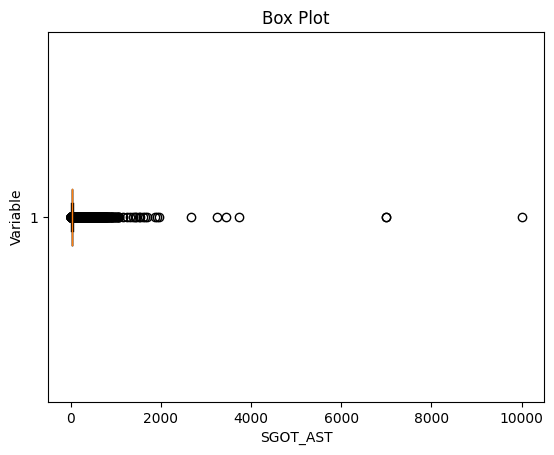

In [ ]:
import matplotlib.pyplot as plt

plt.boxplot(sdd['SGOT_AST'], vert=False)
plt.ylabel('Variable')
plt.xlabel('SGOT_AST')
plt.title('Box Plot')
plt.show()

# this gives the outlier-values(extreme values) for that columns and they can negatively impact our model in predicting so they must be managed

In [ ]:
# Random Forest Training model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

model = RandomForestClassifier(n_estimators=200,max_depth=10,min_samples_leaf=1,
                               min_samples_split=2,max_features='auto',random_state=42,n_jobs=-1)
model.fit(x1train, y1train)

<ipython-input-100-1bcc5f47efe3>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x1train, y1train)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomForestClassifier(max_depth=10, max_features='auto', n_estimators=200,
                       n_jobs=-1, random_state=42)

In [ ]:
y_pred = model.predict(xtest)

In [ ]:
y1_pred = model.predict(x1test)

In [ ]:
accuracy1 = accuracy_score(ytest, y_pred)
print(f'Accuracy: {accuracy1:.2f}')

Accuracy: 0.69


In [ ]:
accuracy2 = accuracy_score(y1test, y1_pred)
print(f'Accuracy2: {accuracy2:.2f}')


Accuracy2: 0.68


In [ ]:
# Grid search tuning for finding best hyperparameters
# This is basically CROSS-VALIDATION of hyperparameters to find the best set for our model
# but this didn't get executed coz. it took too much of time and it said runtime exceeded
# there's no error but time problem. DON;T KNOW WHY!!

from sklearn import tree
from sklearn import decomposition
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

std_slc = StandardScaler()
pca = decomposition.PCA()
dec_tree = tree.DecisionTreeClassifier()
pipe = Pipeline(steps=[('std_slc', std_slc),
                           ('pca', pca),
                           ('dec_tree', dec_tree)])
n_components = list(range(1,xtrain.shape[1]+1,1))
criterion = ['gini', 'entropy']
max_depth = [2,4,6,8,10,12]
parameters = dict(pca__n_components=n_components,
                      dec_tree__criterion=criterion,
                      dec_tree__max_depth=max_depth)
clf_GS = GridSearchCV(pipe, parameters)
clf_GS.fit(xtrain, ytrain)
print('Best Criterion:', clf_GS.best_estimator_.get_params()['dec_tree__criterion'])
print('Best max_depth:', clf_GS.best_estimator_.get_params()['dec_tree__max_depth'])
print('Best Number Of Components:', clf_GS.best_estimator_.get_params()['pca__n_components'])
print(); print(clf_GS.best_estimator_.get_params()['dec_tree'])


In [ ]:
# Decision Trees

from sklearn.tree import DecisionTreeClassifier
model2 = DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=10,
            max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0,
            splitter='best')
model2.fit(x1train, y1train)

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


DecisionTreeClassifier(criterion='entropy', max_depth=10, max_features='auto')

In [ ]:
Y_pred = model2.predict(xtest)

In [ ]:
accuracy3 = accuracy_score(ytest, Y_pred)
print(f'Accuracy3: {accuracy3:.2f}')

Accuracy3: 0.68


In [ ]:
Y1_pred = model2.predict(x1test)

In [ ]:
accuracy4 = accuracy_score(y1test, Y1_pred)
print(f'Accuracy4: {accuracy4:.2f}')

Accuracy4: 0.67


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

model3 = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=10, random_state=42)
model3.fit(xtrain, ytrain)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier(max_depth=10, random_state=42)

In [ ]:
YY_pred = model3.predict(xtest)

In [ ]:
accuracy5 = accuracy_score(ytest, YY_pred)
report = classification_report(ytest, YY_pred)

In [ ]:
print(accuracy5)
print(report)

0.6988610315916014
              precision    recall  f1-score   support

           1       0.81      0.85      0.83    119043
           2       0.45      0.34      0.39     34757
           3       0.53      0.56      0.55     42518

    accuracy                           0.70    196318
   macro avg       0.60      0.58      0.59    196318
weighted avg       0.69      0.70      0.69    196318



In [ ]:
YY1_pred = model3.predict(x1test)

In [ ]:
accuracy6 = accuracy_score(y1test, YY1_pred)
report = classification_report(y1test, YY1_pred)